# Discounting Trends

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# %load_ext autoreload
# the "1" means: always reload modules marked with "%aimport"
# %autoreload 1

#from __future__ import absolute_import, division, print_function
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import seaborn as sns
import numpy as np
import pandas as pd
import os, sys
import warnings
from sqlalchemy import create_engine
#from pivottablejs import pivot_ui


In [4]:
sns.set();
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_context("poster", font_scale=1.3)
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [6]:
#import qgrid # Put imports at the top
#qgrid.nbinstall(overwrite=True)

## Load Data

In [7]:
engine = create_engine('fix pwd')

ArgumentError: Could not parse rfc1738 URL from string 'fix pwd'

In [17]:
sql = '''
SELECT        

	t.FiscalMonth, 
	CAST (m.YearNum AS CHAR(4)) +'Q'+ CAST(m.QuarterNum AS CHAR(1)) AS year_qtr, 
	m.YearNum,  
	f.Branch, 
	i.SalesCategory, 
	t.OrderSourceCode, 
	t.PriceMethod, 
	c.SalesDivision, 
	c.SegCd, 
	SUM(t.ExtBase) AS ExtBase, 
	SUM(t.SalesAmt) AS SalesAmt, 
	SUM(t.ExtDiscLine) AS ExtDiscLine, 
	SUM(t.ExtDiscOrder) AS ExtDiscOrder, 
	SUM(t.ExtDiscAmt) AS ExtDiscAmt, 
	SUM(t.GPAmt) AS GPAmt

FROM            
	BRS_AGG_CMI_DW_Sales AS t 

	INNER JOIN BRS_FiscalMonth AS m 
	ON t.FiscalMonth = m.FiscalMonth 

	INNER JOIN BRS_Customer AS c 
	ON t.Shipto = c.ShipTo 

	INNER JOIN BRS_FSC_Rollup AS f 
	ON f.TerritoryCd = c.TerritoryCd

	INNER JOIN BRS_Item AS i 
	ON t.Item = i.Item 
	

WHERE         
	(t.SalesCategory = 'MERCH') AND 
	(t.FreeGoodsInvoicedInd = 0)  And 
--	(c.BillTo = 2613256) AND
    (f.Branch not in ('CORP', 'ZCORP')) AND
	(t.FiscalMonth BETWEEN 
		(Select [YearFirstFiscalMonth_HIST] FROM BRS_Rollup_Support01 ) and 
		(Select [PriorFiscalMonth] FROM BRS_Rollup_Support01 )
	)

GROUP BY 
	t.FiscalMonth, 
	m.YearNum, 
	m.QuarterNum, 
	f.Branch, 
	i.SalesCategory, 
	t.OrderSourceCode, 
	t.PriceMethod, 
	c.SalesDivision, 
	c.SegCd

'''

In [18]:
￧

In [19]:
print (df.dtypes)
df.describe()


FiscalMonth          int64
year_qtr            object
YearNum              int64
Branch              object
SalesCategory       object
OrderSourceCode     object
PriceMethod         object
SalesDivision       object
SegCd               object
ExtBase            float64
SalesAmt           float64
ExtDiscLine        float64
ExtDiscOrder       float64
ExtDiscAmt         float64
GPAmt              float64
dtype: object


,FiscalMonth,YearNum,ExtBase,SalesAmt,ExtDiscLine,ExtDiscOrder,ExtDiscAmt,GPAmt
count,57488.000000,57488.000000,5.748800e+04,5.748800e+04,57488.000000,57488.000000,57488.000000,57488.000000
mean,201593.255218,2015.869851,1.289619e+04,1.127572e+04,1553.328154,67.144542,1620.472696,4864.356667
std,83.499556,0.843136,4.742747e+04,4.349423e+04,6042.245587,1275.488337,6379.266603,19785.874724
min,201412.000000,2014.000000,-3.937170e+04,-5.183210e+04,-122490.970000,-7024.400000,-122490.970000,-52163.910000
25%,201508.000000,2015.000000,3.194150e+02,2.647975e+02,18.000000,0.000000,18.000000,108.657500
50%,201605.000000,2016.000000,1.574640e+03,1.312145e+03,145.275000,0.000000,148.000000,537.690000
75%,201701.000000,2017.000000,6.986882e+03,5.852610e+03,865.410000,0.000000,881.442500,2404.907500
max,201709.000000,2017.000000,1.871733e+06,1.727579e+06,408501.720000,121651.480000,408501.720000,754200.230000


In [20]:
qgrid.show_grid(df, remote_js=True)

NameError: name 'qgrid' is not defined

## Trends

In [21]:
df.YearNum.unique()

array([2014, 2017, 2015, 2016])

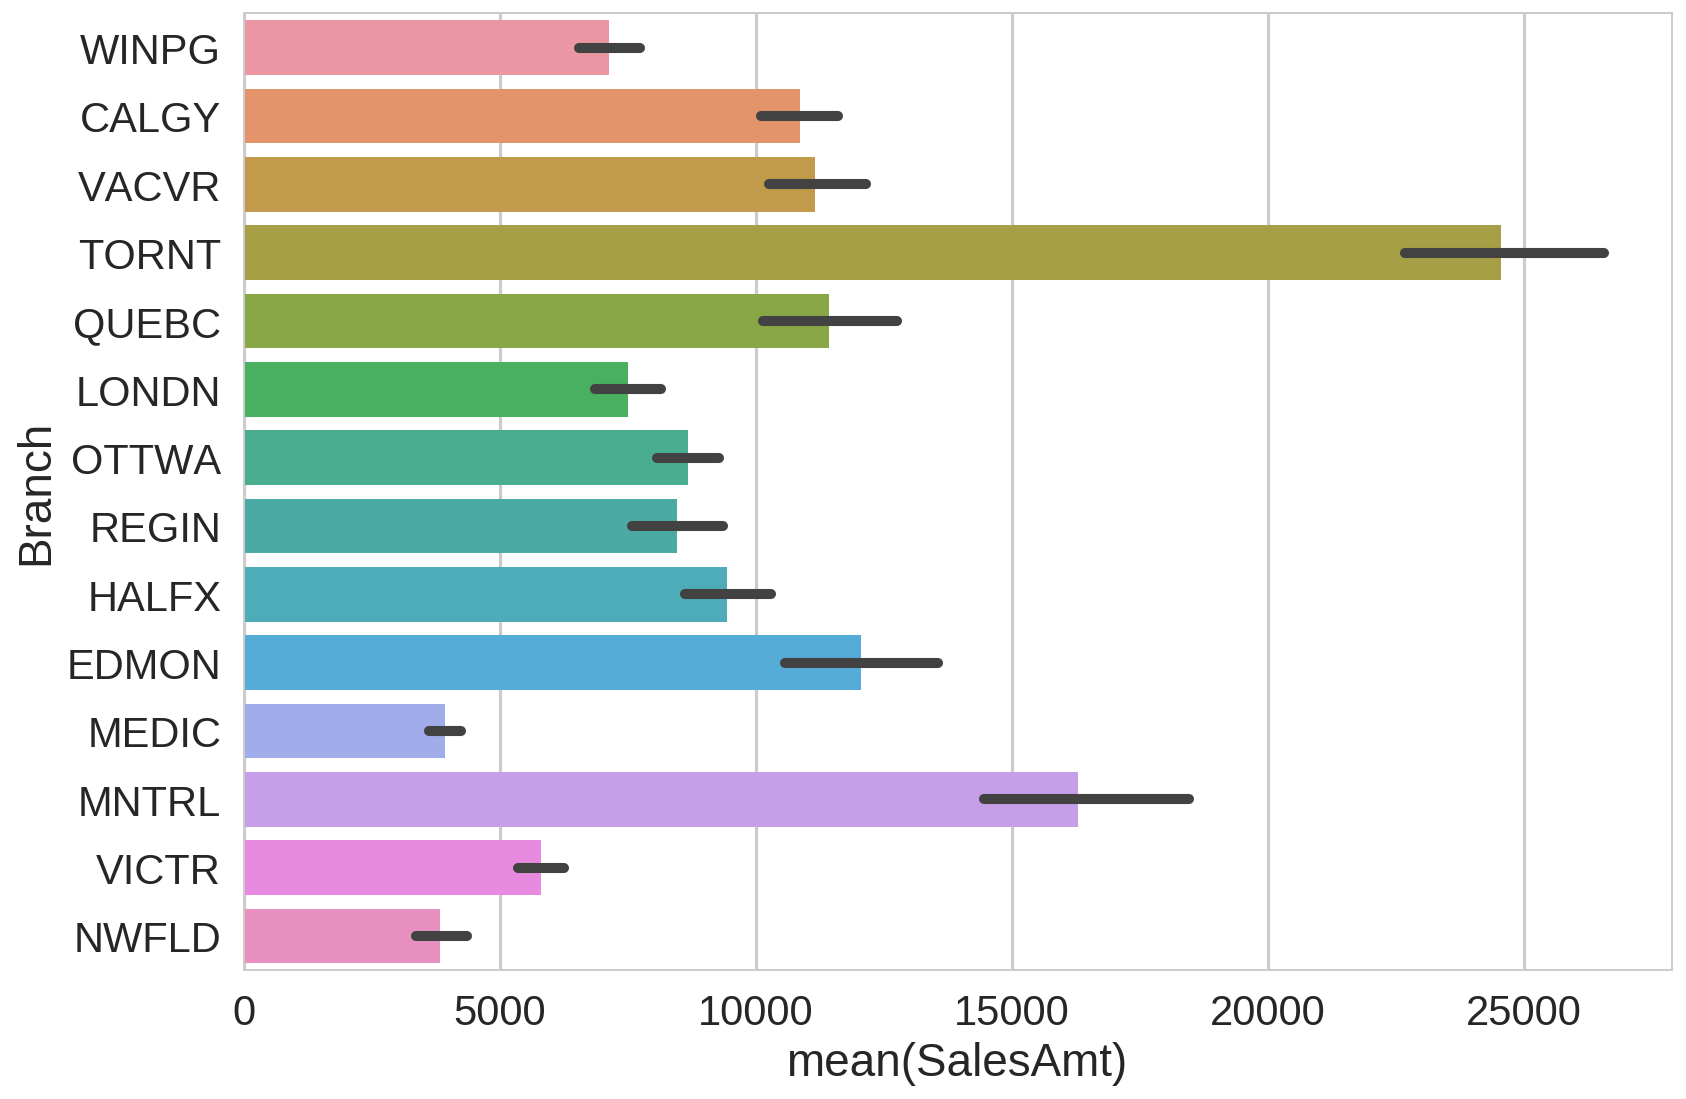

In [22]:
sns.barplot(data=df,x='SalesAmt',y='Branch',orient='h')

In [23]:
%time df2 = pd.read_sql_query('select * from BRS_Item', engine);

CPU times: user 8.54 s, sys: 348 ms, total: 8.88 s
Wall time: 8.88 s


In [24]:
df2.shape

(213901, 28)